First remove scrolling in output

In [299]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [300]:
ls /mnt/SCA1/CARDIS/script/graph_gan/numeric/stm32/segan/translate-device/tanh_rmsprop_128_0/f0pwtof1pw/ascad/

08BF0PW+08BF1PW.npy*  08BF0PW.npy*  08BF1PW.npy*


In [301]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [307]:
# path with arguments 0: family / 1: archi / 2: scenario / 3: target
path_format = '/mnt/SCA1/CARDIS/script/graph_gan/numeric/{0:}/segan/translate-{2:}/tanh_rmsprop_128_0/{3:}/{1:}/'
archis = {
    'ascad': 'blue',
    'noConv1': 'orange',
    'zaid': 'green'
}

# Core plotting procedure

## Graph style

In [303]:
import matplotlib
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('legend', fontsize=14)
matplotlib.rc('axes', titlesize=14)
matplotlib.rc('axes', labelsize=14)
fig_height = 3
fig_width = 11

## Core function

In [304]:
def plot_comparative_ge(family,scenario,experiment,label='',**kwargs):
    if 'path_format' in kwargs:
        pformat = kwargs['path_format']
    else:
        pformat = path_format
    fig, axes = plt.subplots(1,2)
    target = experiment.split('to')[0].upper()
    label = 'Targeting {}'.format(target)
    #plt.suptitle(label, fontsize=20, y=1.1)
    print(label)
    axes[0].set_title('Directly applying pre-trained models')
    axes[1].set_title('Using trace translation')
    fig.set_figheight(fig_height)
    fig.set_figwidth(fig_width)
    for ax in axes:
        ax.set_xlabel('Nr of traces on the target device')
        ax.set_ylabel('GE')
        ax.set_xlim(1,1000)
        ax.set_ylim(0,256)
        if 'xlim' in kwargs:
            ax.set_xlim(1,kwargs['xlim'])
        if 'ylim' in kwargs:
            ax.set_ylim(0,kwargs['ylim'])
        ax.grid()
    for archi , color in archis.items():
        path = pformat.format(family,archi,scenario,experiment)
        files = os.listdir(path)
        for file in files:
            training_device = file.split('08B')[-1][:-4]
            ge = np.load(os.path.join(path,file))
            plot_axis = 0
            ls = '-'
            label = '{} ({})'.format(training_device,archi)
            if target != training_device.upper():
                ls = '--'
            if '+' in file:
                plot_axis =  1
            axes[plot_axis].plot(np.array([i for i in range(1,len(ge)+1)]),ge,label=label,ls=ls,color=color)
    axes[0].legend(loc='upper center',bbox_to_anchor=(1.1, -0.3),ncol=3)
    plt.show()

# Cross channel

In [281]:
family = 'stm32'
scenario = 'side'
devices = ['F0','F1','F2','F3','F4']

Targeting F0EM


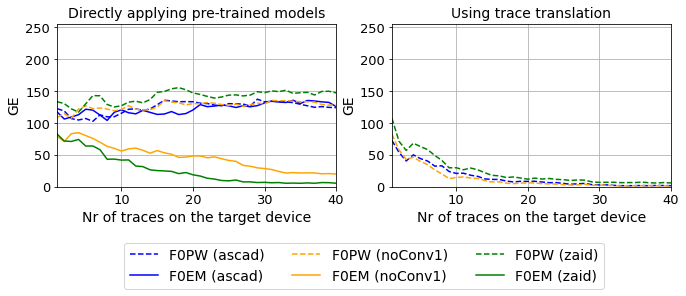

Targeting F1EM


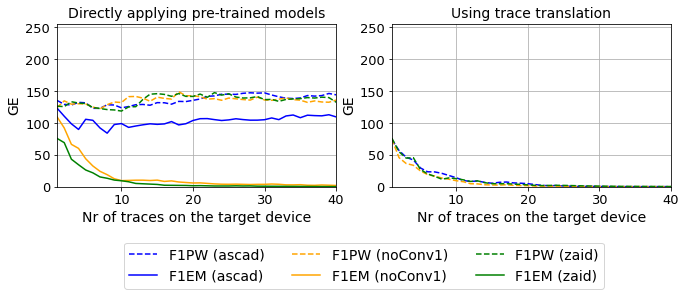

Targeting F2EM


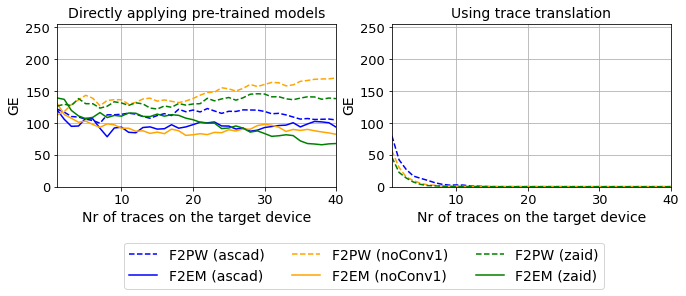

Targeting F3EM


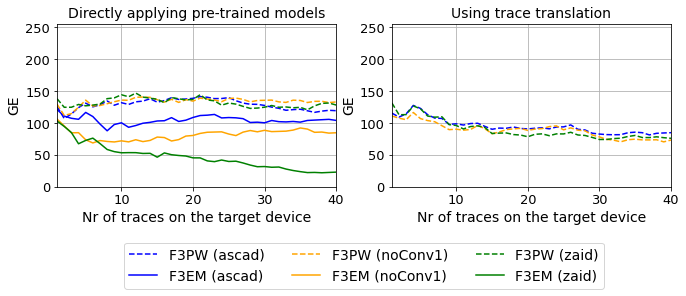

Targeting F4EM


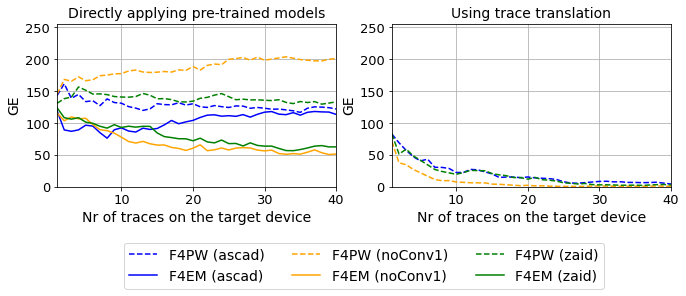

In [282]:
for device in devices:
    target = '{0:}emto{0:}pw'.format(device.lower())
    plot_comparative_ge(family,scenario,target,xlim=40)

# Cross-Device

In [308]:
family = 'stm32'
scenario = 'device'
#scenario = 'device2'
#path_format = '/mnt/SCA1/CARDIS/script/graph_gan/numeric/{0:}/segan/translate-{2:}/tanh_rmsprop_128_001/{3:}/{1:}/'

Targeting F0PW


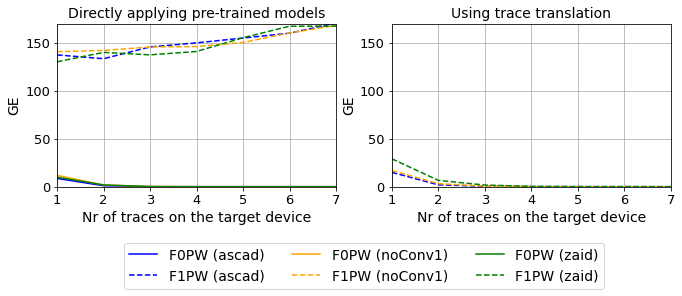

In [309]:
plot_comparative_ge(family,scenario,'f0pwtof1pw',xlim=7,ylim=170)

Targeting F0PW


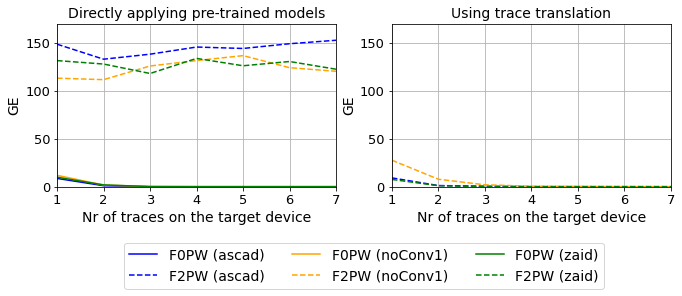

In [285]:
plot_comparative_ge(family,scenario,'f0pwtof2pw',xlim=7,ylim=170)

Targeting F0PW


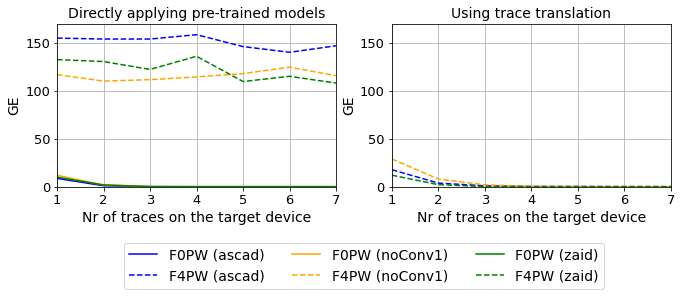

In [286]:
plot_comparative_ge(family,scenario,'f0pwtof4pw',xlim=7,ylim=170)

Targeting F1PW


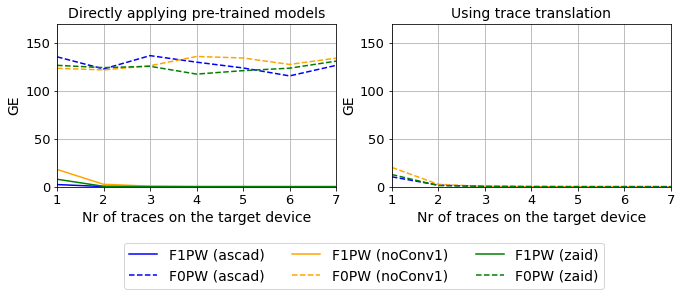

In [287]:
plot_comparative_ge(family,scenario,'f1pwtof0pw',xlim=7,ylim=170)

Targeting F1PW


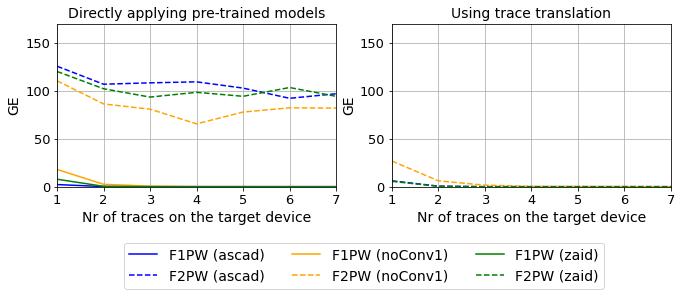

In [288]:
plot_comparative_ge(family,scenario,'f1pwtof2pw',xlim=7,ylim=170)

Targeting F1PW


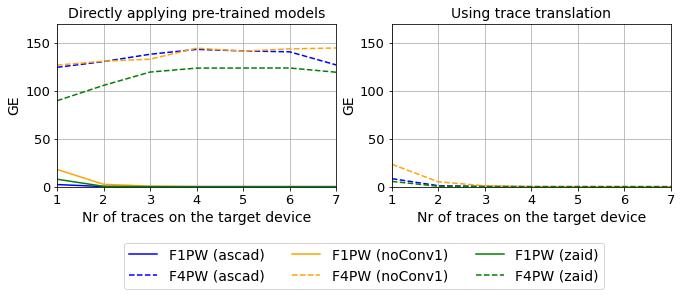

In [289]:
plot_comparative_ge(family,scenario,'f1pwtof4pw',xlim=7,ylim=170)

Targeting F2PW


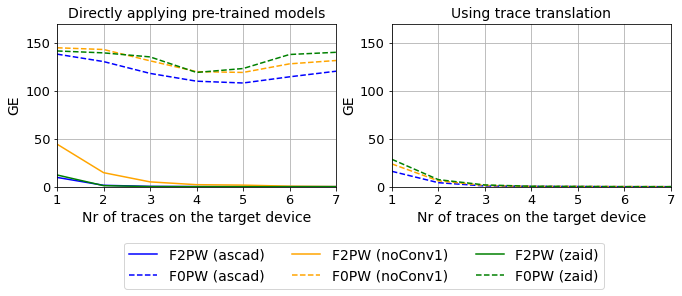

In [290]:
plot_comparative_ge(family,scenario,'f2pwtof0pw',xlim=7,ylim=170)

Targeting F2PW


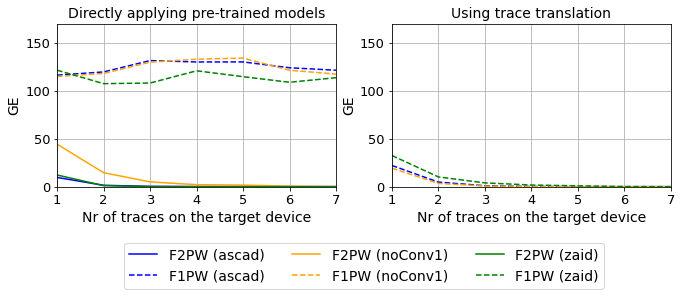

In [291]:
plot_comparative_ge(family,scenario,'f2pwtof1pw',xlim=7,ylim=170)

Targeting F2PW


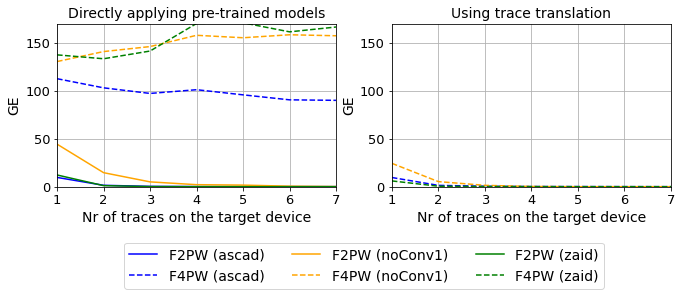

In [292]:
plot_comparative_ge(family,scenario,'f2pwtof4pw',xlim=7,ylim=170)

Targeting F4PW


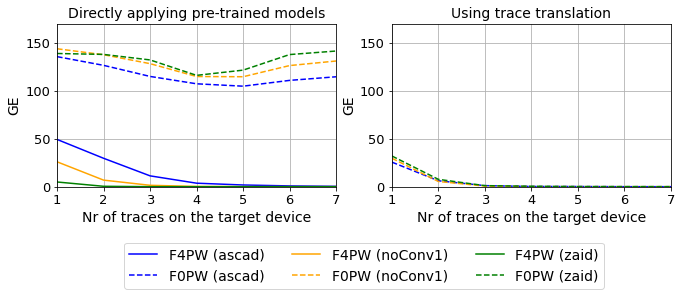

In [293]:
plot_comparative_ge(family,scenario,'f4pwtof0pw',xlim=7,ylim=170)

Targeting F4PW


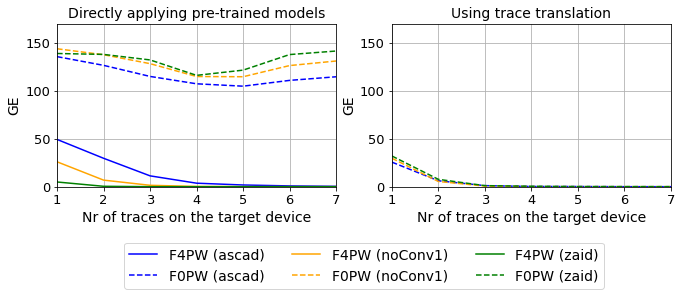

In [294]:
plot_comparative_ge(family,scenario,'f4pwtof0pw',xlim=7,ylim=170)

Targeting F4PW


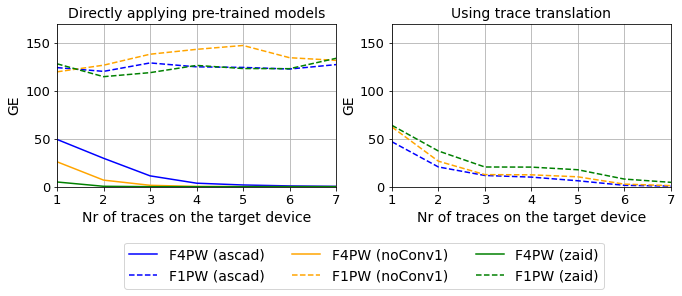

In [295]:
plot_comparative_ge(family,scenario,'f4pwtof1pw',xlim=7,ylim=170)

Targeting F4PW


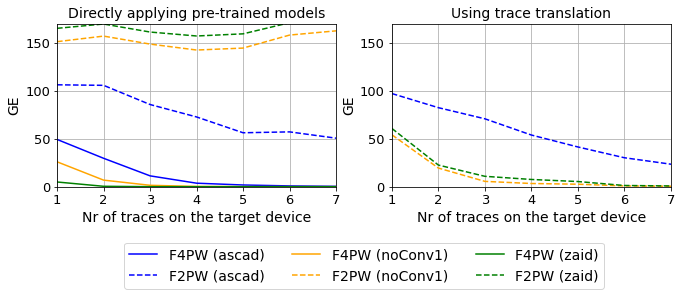

In [296]:
plot_comparative_ge(family,scenario,'f4pwtof2pw',xlim=7,ylim=170)

### Nano case

In [172]:
nano_path_format = '/mnt/SCA1/CARDIS/script/graph_gan/numeric/{0:}/segan/translate-{2:}/tanh_rmsprop_128_001/{3:}/{1:}/'

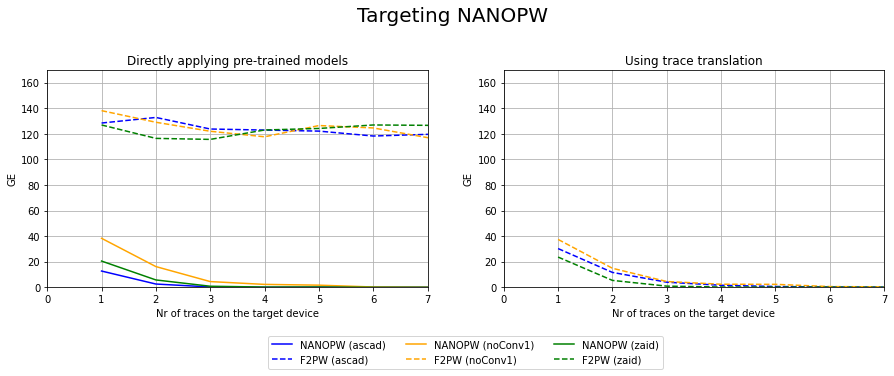

In [174]:
plot_comparative_ge(family,scenario,'nanopwtof2pw',xlim=7,ylim=170,path_format=nano_path_format)

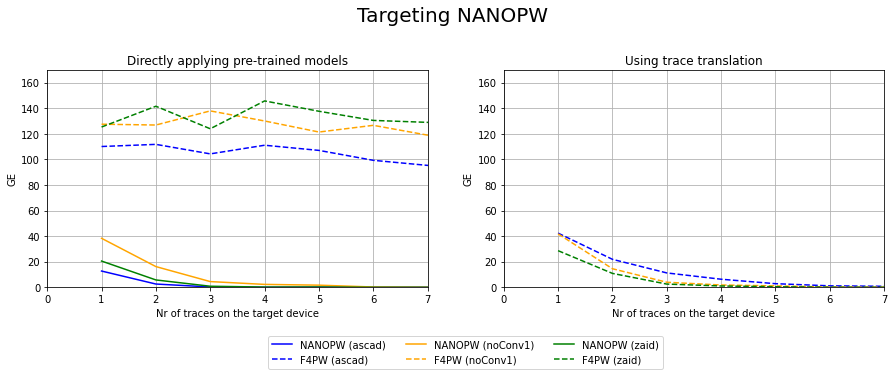

In [169]:
plot_comparative_ge(family,scenario,'nanopwtof4pw',xlim=30,ylim=170,path_format=nano_path_format)


# F3EM to F2

In [297]:
nano_path_format = '/mnt/SCA1/CARDIS/script/graph_gan/numeric/{0:}/segan/translate-{2:}/tanh_rmsprop_128_0001/{3:}/{1:}/'

Targeting F3EM


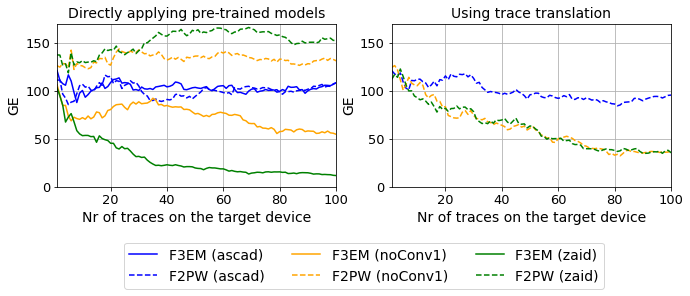

In [298]:
plot_comparative_ge(family,scenario,'f3emtof2pw',xlim=100,ylim=170,path_format=nano_path_format)